In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
from keras import layers
from keras.models import Model
from keras import optimizers
from glob import glob
import pathlib
import matplotlib.pyplot as plt


In [4]:
densenet = DenseNet201(input_shape = (55,55,3),include_top=False,weights='imagenet')
for layer in densenet.layers:
    layer.trainable = False
out = densenet.output

x = Flatten()(out)
x = Dense(40,activation = 'softmax')(x)

model = Model(inputs=densenet.input,outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

74836368/74836368 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55, 55, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 61, 61, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 28, 28, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 28, 28, 64)   256         ['conv1/conv[0][0]']             
                             

In [5]:
path_train = pathlib.Path('./images/train/')
path_test = pathlib.Path('./images/test/')
train_images_files = path_test.glob('*/*.jpeg')
test_images_files = path_test.glob('*/*.jpeg')

In [7]:
train_dir = './images/train/'
validation_dir = './images/test/'

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 30

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size=(55,55),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    )

validation_generator = test_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=(55,55),
    batch_size=batch_size,
    class_mode='categorical')

Found 27761 images belonging to 40 classes.
Found 10008 images belonging to 40 classes.


In [8]:
epochs = 50
history = model.fit_generator(
    train_generator,
    steps_per_epoch= len(list(train_images_files))//batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=len(list(test_images_files))//batch_size
)

C:\Users\hp\AppData\Local\Temp\ipykernel_22188\853784012.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
333/333 [==============================] - 283s 755ms/step - loss: 3.2563 - accuracy: 0.1513 - val_loss: 2.9886 - val_accuracy: 0.2083
Epoch 2/50
333/333 [==============================] - 240s 722ms/step - loss: 2.8320 - accuracy: 0.2503 - val_loss: 2.7913 - val_accuracy: 0.2448
Epoch 3/50
333/333 [==============================] - 229s 688ms/step - loss: 2.6482 - accuracy: 0.2935 - val_loss: 2.6707 - val_accuracy: 0.2776
Epoch 4/50
333/333 [==============================] - 226s 678ms/step - loss: 2.5121 - accuracy: 0.3282 - val_loss: 2.6161 - val_accuracy: 0.2881
Epoch 5/50
333/333 [==============================] - 215s 645ms/step - loss: 2.4159 - accuracy: 0.3449 - val_loss: 2.5574 - val_accuracy: 0.3057
Epoch 6/50
333/333 [==============================] - 214s 643ms/step - loss: 2.3592 - accuracy: 0.3540 - val_loss: 2.5069 - val_accuracy: 0.3216
Epoch 7/50
333/333 [==============================] - 217s 654ms/step - loss: 2.3151 - accuracy: 0.3654 - val_loss: 2.4632 -

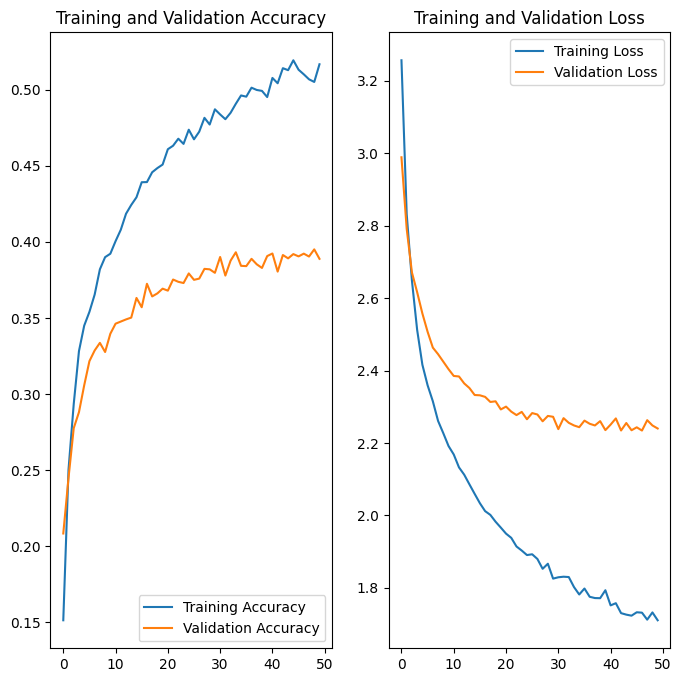

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()